In [207]:
def sales(state):
    import csv

    temp = {}

    # opening the CSV file
    with open('usa.csv', mode='r') as file:
        # reading the CSV file
        csvFile = csv.DictReader(file)

        # displaying the contents of the CSV file
        for lines in csvFile:
            if (lines['Prscrbr_Geo_Desc'] == state):
                words = lines['Gnrc_Name']
                count = int(lines['Tot_Clms'])
                words = words.split('/')
                for word in words:
                    word = word.lower()
                    if word in temp:
                        temp[word] += count
                    else:
                        temp[word] = count
                        
    return temp

#print(dict)


In [213]:
import csv

place_array = []

# opening the CSV file
with open('usa.csv', mode='r') as file:
    # reading the CSV file
    csvFile = csv.DictReader(file)

    # displaying the contents of the CSV file
    for lines in csvFile:
        place = lines['Prscrbr_Geo_Desc']
        if (place not in place_array):
            place_array.append(place)

print(place_array)
state = input("Enter the state name : ")

if (state not in  place_array):
    print("State not found")
else:
    dict1 = sales(state)


print(dict1)

['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'Armed Forces Central/South America', 'Armed Forces Europe', 'Armed Forces Pacific', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Foreign Country', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'National', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Unknown', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
{'0.9 % sodium chloride': 7625, 'aa 4.25%': 11, 'calcium': 11, 'lytes': 11, 'dex 10%': 11, 'aa 5%': 25, 'd15w': 25, 'electrolytes': 25, 'ab

In [209]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = [x for x in dict1]
# corresponding y axis values
y = [dict1[x] for x in dict1]

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('Content')
# naming the y axis
plt.ylabel('Quantity')

# giving a title to my graph
plt.title('Graph')

# function to show the plot
plt.show()


KeyboardInterrupt: 

In [214]:
import csv

dict2 = {}

# opening the CSV file
with open('who.csv', mode='r') as file:
    # reading the CSV file
    csvFile2 = csv.DictReader(file)

    # displaying the contents of the CSV file
    for lines in csvFile2:
        disease = lines['Indication']
        quantity = lines['Formulations']
        quantity = quantity.replace(" ", "")
        contents = lines['Medicine name']
        contents = contents.replace(" + ","/")
        contents = contents.replace("+ ","/")
        contents = contents.replace(" +","/")
        contents = contents.replace("+","/")
        #print(content_array)
        
        for i in range(len(quantity)):
            if (i<=len(quantity)-2):
                if (quantity[i]=='m' and quantity[i+1]=='g'):
                    i = i-1
                    qua = 0
                    factor = 1
                    while(quantity[i].isdigit()):
                        qua = qua+factor*int(quantity[i])
                        i-=1

            if (quantity[i]=='%'):
                i = i-1
                qua = 0
                factor = 1
                while(quantity[i].isdigit()):
                    qua = qua+factor*int(quantity[i])
                    factor = factor*10
                    i-=1
        
        
        
        arr = []
        arr.append(contents)
        arr.append(qua)
            
        if disease not in dict2:
            dict2[disease] = []
            dict2[disease].append(arr)

        else:
            dict2[disease].append(arr)
        
print(dict2)


{'Human immunodeficiency virus disease without mention of associated disease or condition, clinical stage unspecified': [['abacavir', 3], ['abacavir/lamivudine', 6], ['abacavir/lamivudine/lopinavir/ritonavir', 1], ['atazanavir', 3], ['atazanavir/ritonavir', 1], ['cobicistat/elvitegravir/emtricitabine/tenofovir disoproxil fumarate', 11], ['cobicistat/elvitegravir/emtricitabine/tenofovir alafenamide', 1], ['darunavir', 8], ['didanosine', 4], ['dolutegravir', 1], ['dolutegravir/lamivudine/tenofovir', 11], ['efavirenz', 6], ['efavirenz/emtricitabine/tenofovir', 11], ['efavirenz/lamivudine/tenofovir', 11], ['efavirenz/lamivudine/tenofovir', 11], ['emtricitabine', 2], ['emtricitabine/rilpivirine/tenofovir alafenamide', 7], ['emtricitabine/rilpivirine/tenofovir disoproxil fumarate', 11], ['emtricitabine/tenofovir', 11], ['emtricitabine/tenofovir alafenamide', 7], ['indinavir', 4], ['lamivudine', 6], ['lamivudine/nevirapine/zidovudine', 3], ['lamivudine/tenofovir', 3], ['lamivudine/zidovudine'

In [215]:
sevierty = {}
check = []

for disease in dict2:
    if disease not in sevierty:
        severe_num = 0
        #print(disease)
        for content in dict2[disease]:
            #print(content)
            ############# content[1] is coefficient
            if content[0] in dict1:
                check.append(content[0])
                #print("YESS")
                #print(content[0])
                severe_num = severe_num + content[1]*dict1[content[0]]
                #print(content[1]*dict1[content[0]])
        sevierty[disease] = severe_num

    else:
        #print(disease)
        for content in dict2[disease]:
            #print(content)
            ############# content[1] is coefficient
            if content[0] in dict1:
                #print("YESS")
                #print(content[0])
                severe_num = severe_num + content[1]*dict1[content[0]]
                #print(content[1]*dict1[content[0]])
        sevierty[disease] = sevierty[disease] + severe_num

#print(check)
print(sevierty)


{'Human immunodeficiency virus disease without mention of associated disease or condition, clinical stage unspecified': 90583, 'Other specified malignant neoplasms of breast': 36410, 'Malignant neoplasms of prostate': 1184491, 'Primary open-angle glaucoma': 463629, 'Infectious diseases of external ear': 100841, 'Exposure to or harmful effects of undetermined intent of analgesics, antipyretics or nonsteroidal anti-inflammatory drugs': 7440, 'Acute or subacute hepatic failure': 7440, 'Migraine': 387405, 'Acute myocardial infarction': 0, 'Cerebral ischaemic stroke': 0, 'Acute rheumatic fever without mention of heart involvement': 0, 'Mucocutaneous lymph node syndrome': 0, 'Juvenile idiopathic arthritis': 657193, 'Pain': 581373, 'Zoster': 0, 'Varicella': 0, 'Herpes simplex infections': 0, 'Herpes simplex keratitis': 0, 'Chronic obstructive pulmonary disease': 479864, 'Unspecified injury, poisoning or certain other consequences of external causes': 0, 'Axial spondyloarthritis': 97704, 'Croh

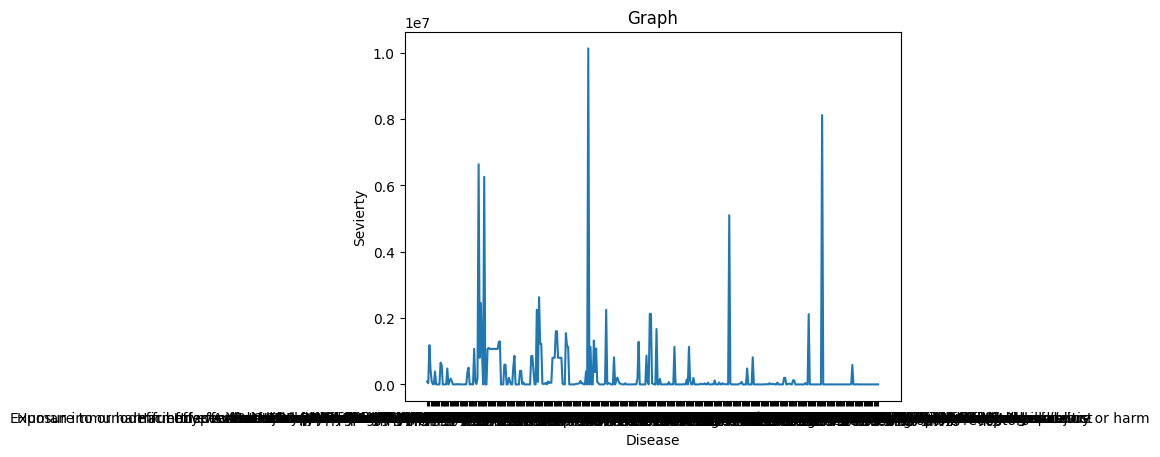

In [216]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = [x for x in sevierty]
# corresponding y axis values
y = [sevierty[x] for x in sevierty]

# plotting the points
plt.plot(x, y)

# naming the x axisevierty
plt.xlabel('Disease')
# naming the y axis
plt.ylabel('Sevierty')

# giving a title to my graph
plt.title('Graph')

# function to show the plot
plt.show()


[('Heart failure', 10127705), ('Hypokalaemia', 8118900), ('Oedema', 6636109), ('Essential hypertension', 6256451), ('Neuropathic pain', 5099928)]


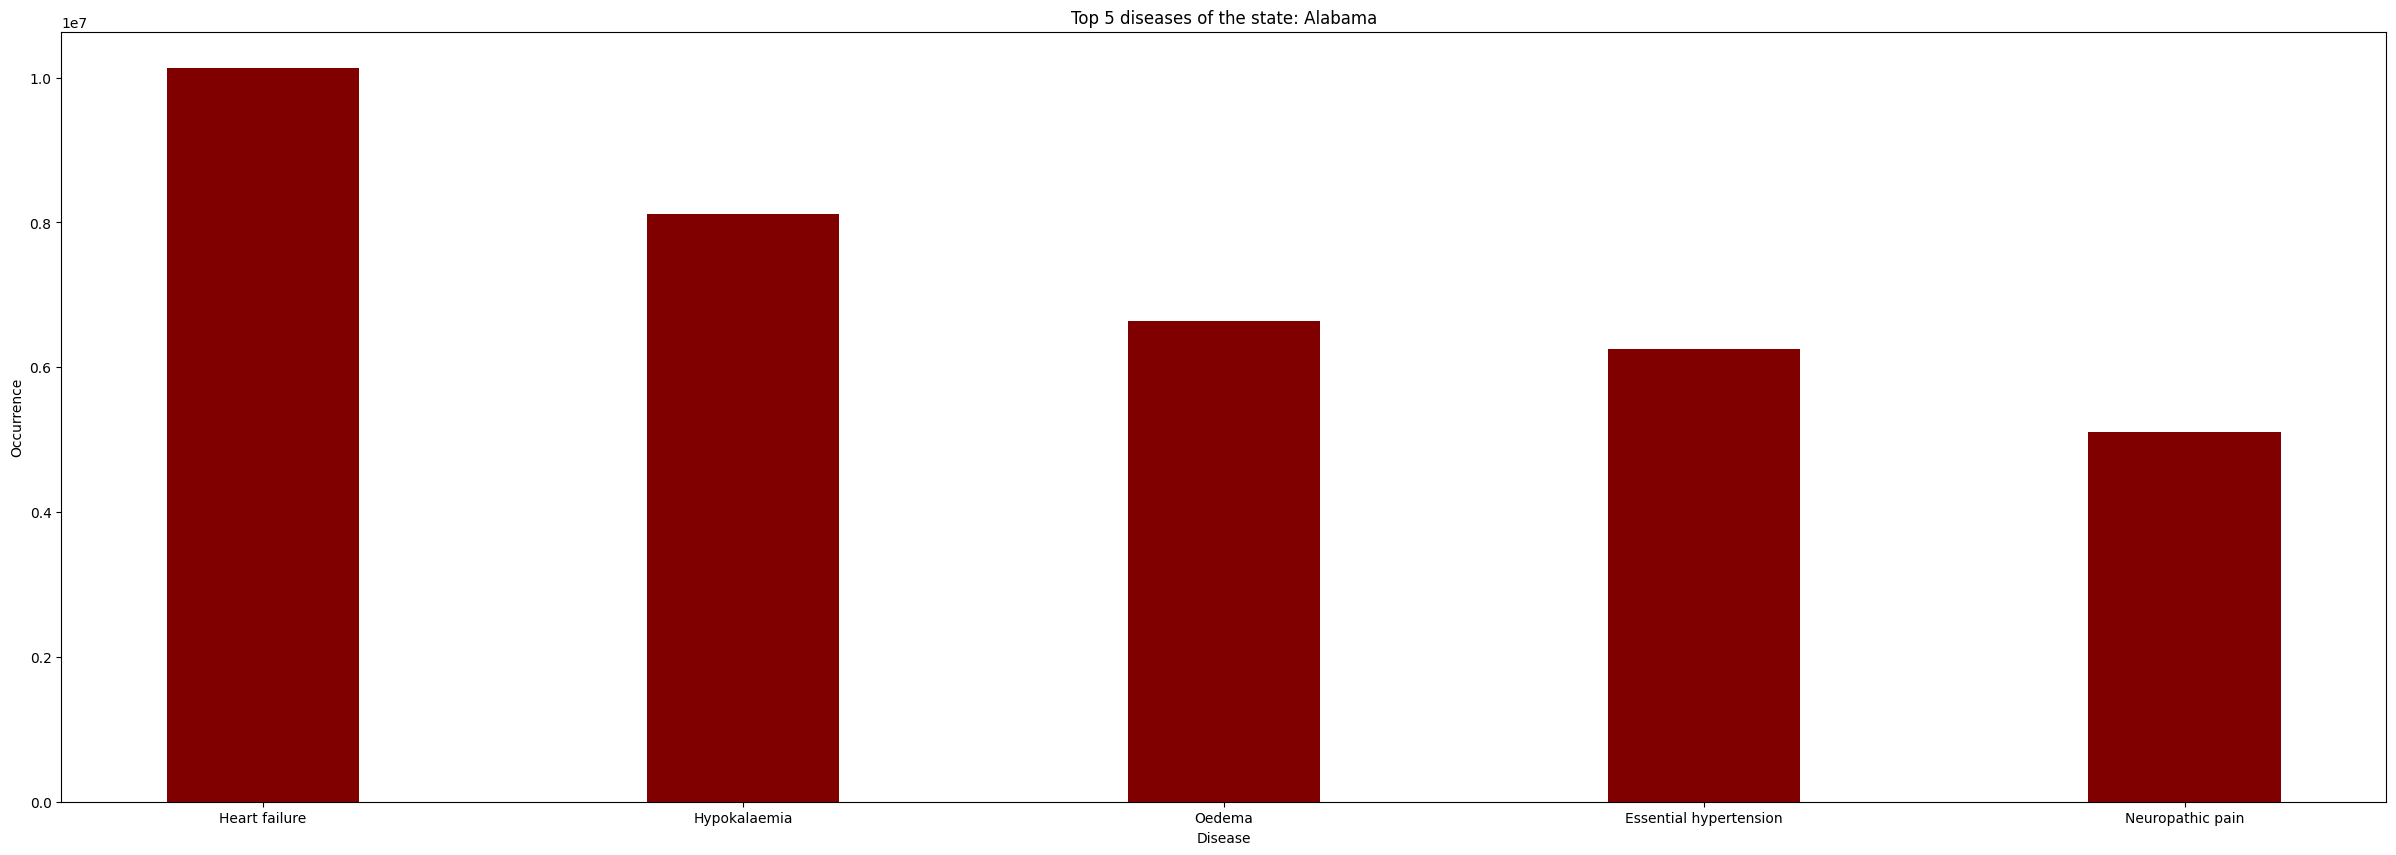

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

sev_data = (sorted(sevierty.items(), key=itemgetter(1), reverse=True)[:5])
print(sev_data)

courses = [x[0] for x in sev_data]
values = [x[1] for x in sev_data]

fig = plt.figure(figsize=(30, 10))

# creating the bar plot
plt.bar(courses, values, color='maroon', width=0.4)

plt.xlabel("Disease")
plt.ylabel("Occurrence")
plt.title("Top 5 diseases of the state: " + state)
plt.show()

